In [163]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 250

In [165]:
df = pd.read_csv('data/voting_data_anonymized.tsv', sep='\t')
df.head()

,age,sex,party,party guess,race,ethnicity,precinct,prop value,voted 2010,voted 2011,voted 2012,voted 2013,voted 2014,voted 2015,voted 2016,voted 2017,voted 2018,voted 2019,voted 2020,voted 2021
0,83,M,U,R,WHITE,JEWISH,3,610.0,True,False,False,False,False,False,False,False,False,True,False,False
1,37,M,U,U,UNKNOWN,BRITISH,5,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48,F,U,D,ASIAN,EASTASIAN,3,640.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,False,True
3,61,F,U,R,WHITE,JEWISH,2,840.0,False,False,False,True,True,True,True,True,True,True,True,False
4,40,F,U,R,WHITE,BRITISH,3,700.0,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False


In [166]:
df.shape

(11775, 20)

In [167]:
df.columns

Index(['age', 'sex', 'party', 'party guess', 'race', 'ethnicity', 'precinct',
       'prop value', 'voted 2010', 'voted 2011', 'voted 2012', 'voted 2013',
       'voted 2014', 'voted 2015', 'voted 2016', 'voted 2017', 'voted 2018',
       'voted 2019', 'voted 2020', 'voted 2021'],
      dtype='object')

In [168]:
df.describe()

,age,precinct,prop value
count,11775.000000,11775.000000,11124.000000
mean,50.977580,2.987006,612.432578
std,18.385215,1.408165,199.554880
min,18.000000,1.000000,130.000000
25%,37.000000,2.000000,480.000000
50%,52.000000,3.000000,570.000000
75%,65.000000,4.000000,720.000000
max,105.000000,5.000000,2170.000000


In [169]:
for col in df.columns:
    data_type = df[col].dtype
    # print(col, df[col].dtype)
    if data_type==np.int64:
        print(f'{col} - type:int64 min:{df[col].min()} max:{df[col].max()} mean:{df[col].mean():.2f} median:{df[col].median():.2f}')
    elif data_type==np.float64:
        print(f'{col} - type:float64 min:{df[col].min()} max:{df[col].max()} mean:{df[col].mean():.2f} median:{df[col].median():.2f}')
    elif data_type==object:
        print(f'{col} - type:object values:{list(df.groupby(col).groups.keys())}')
        for i,v in df.groupby(col).count().max(axis=1).iteritems():
            print(f'    {i}: {v}')
    else:
        print(f'{col} - unknown data type: {data_type}')
    

age - type:int64 min:18 max:105 mean:50.98 median:52.00
sex - type:object values:['F', 'M', 'U']
    F: 5237
    M: 5144
    U: 1394
party - type:object values:['D', 'R', 'U']
    D: 3718
    R: 714
    U: 7343
party guess - type:object values:['D', 'R', 'U']
    D: 7519
    R: 1686
    U: 2570
race - type:object values:['ASIAN', 'BLACK', 'HISPANIC', 'UNKNOWN', 'WHITE']
    ASIAN: 1471
    BLACK: 256
    HISPANIC: 109
    UNKNOWN: 1211
    WHITE: 8728
ethnicity - type:object values:['AFRICANS', 'BRITISH', 'EASTASIAN', 'EASTEUROPEAN', 'FRENCH', 'GERMANIC', 'HISPANIC', 'INDIANSUBCONTINENT', 'ITALIAN', 'JAPANESE', 'JEWISH', 'MUSLIM', 'NORDIC']
    AFRICANS: 107
    BRITISH: 5500
    EASTASIAN: 750
    EASTEUROPEAN: 517
    FRENCH: 387
    GERMANIC: 118
    HISPANIC: 283
    INDIANSUBCONTINENT: 819
    ITALIAN: 470
    JAPANESE: 41
    JEWISH: 2345
    MUSLIM: 311
    NORDIC: 127
precinct - type:int64 min:1 max:5 mean:2.99 median:3.00
prop value - type:float64 min:130.0 max:2170.0 mean:612

<AxesSubplot:title={'center':'Race Guessed'}, ylabel='(age, count)'>

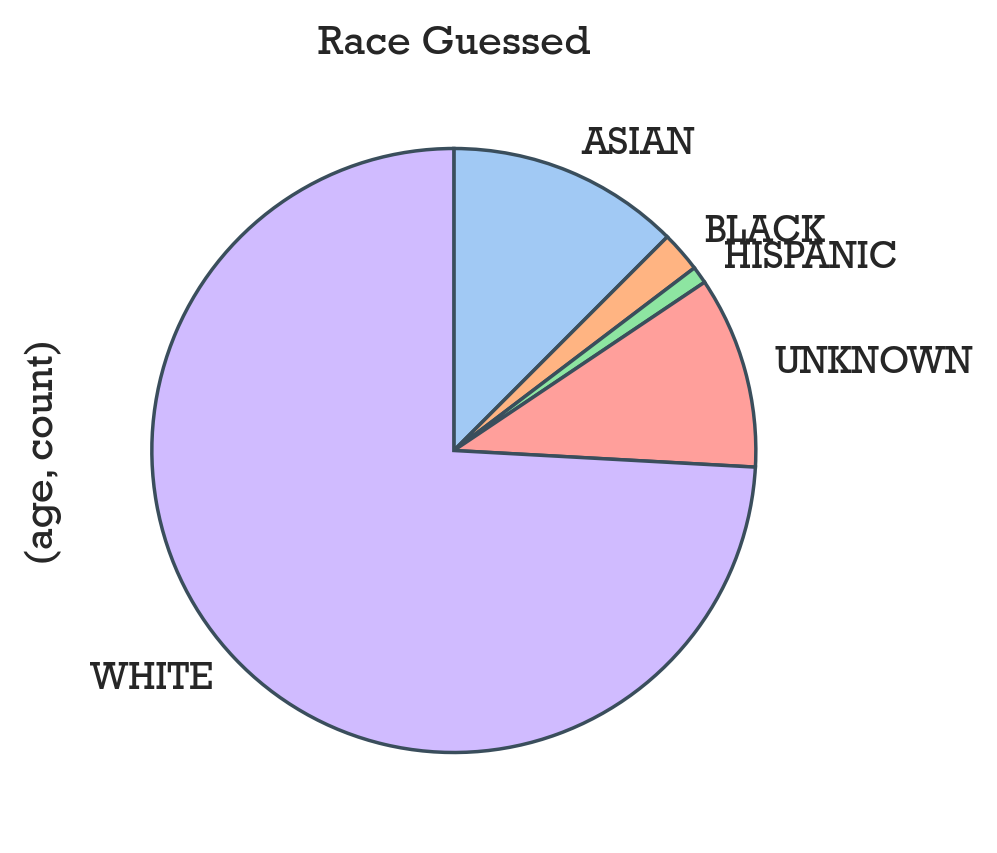

In [170]:
sns.set_theme()
sns.set(style="whitegrid", palette='pastel',font="Rockwell")
df[['race','age']].groupby('race').describe()['age','count'].plot(kind='pie', 
        title='Race Guessed', counterclock=False, 
        startangle=-270, 
        wedgeprops={'edgecolor':'#3a4e5c','linewidth': 1, 'antialiased': True})


<AxesSubplot:xlabel='ethnicity'>

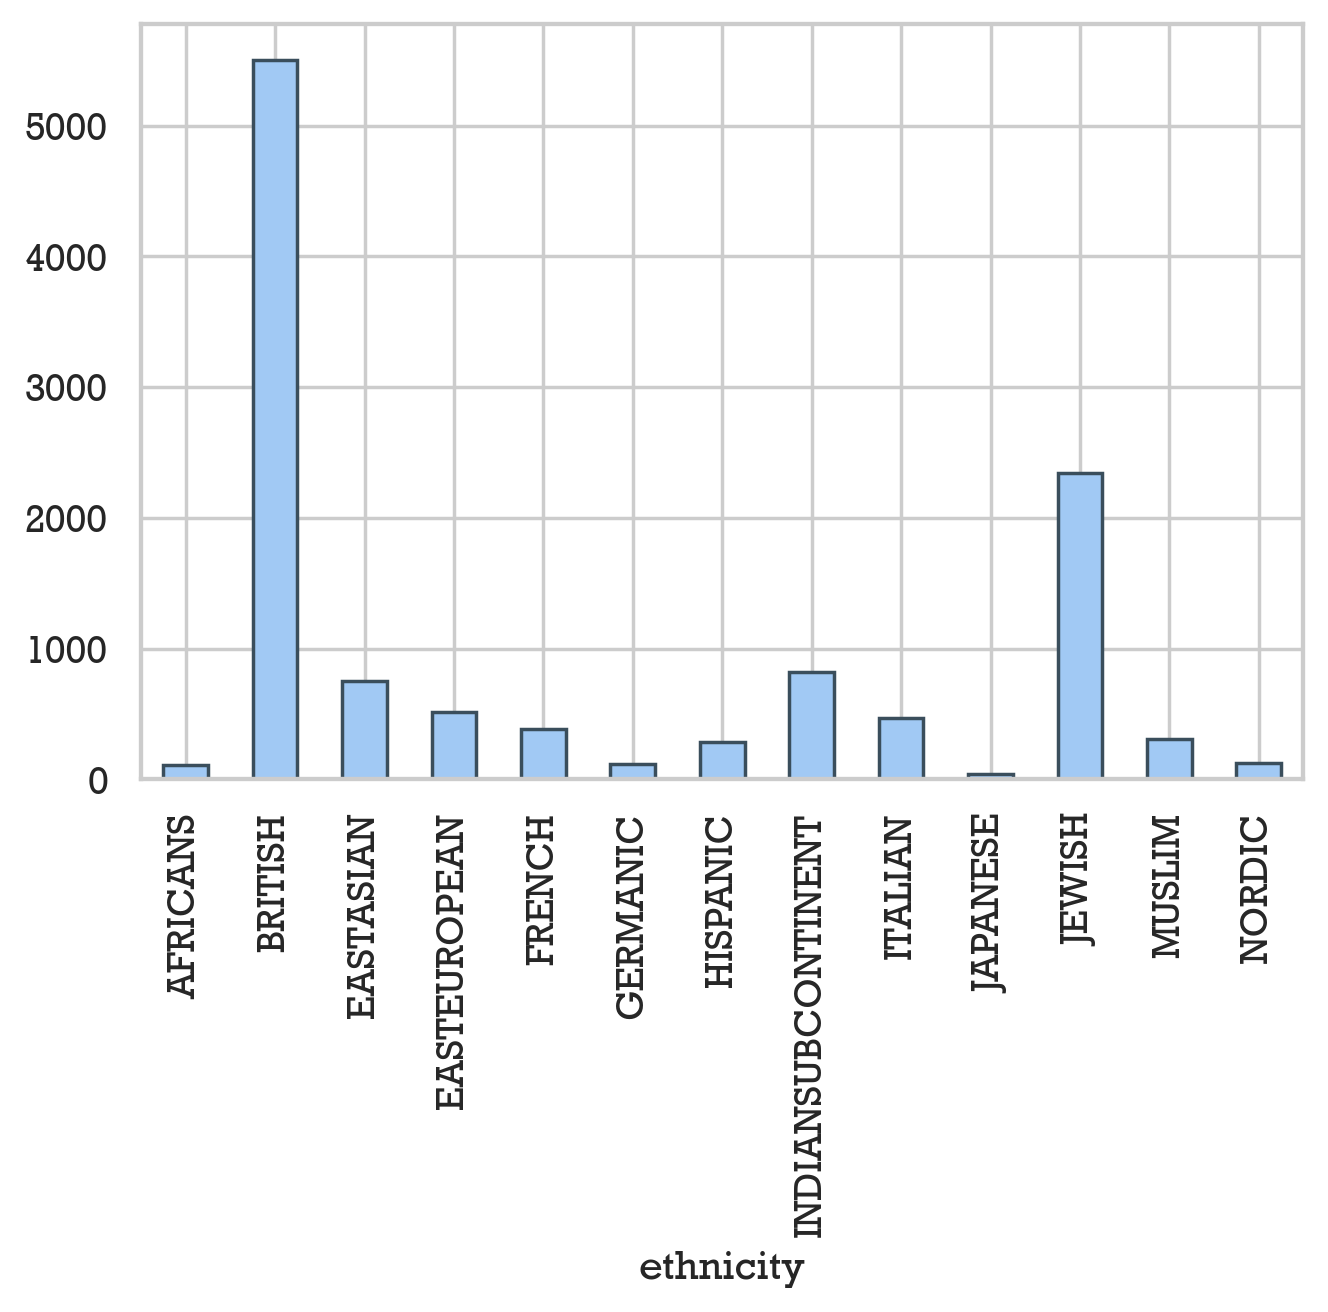

In [171]:
sns.set_theme()
sns.set(style="whitegrid", palette='pastel',font="Rockwell")
df[['ethnicity','age']].groupby('ethnicity').describe()['age','count'].plot(kind='bar', 
        edgecolor='#3a4e5c')

<AxesSubplot:title={'center':'Party'}, ylabel='(age, count)'>

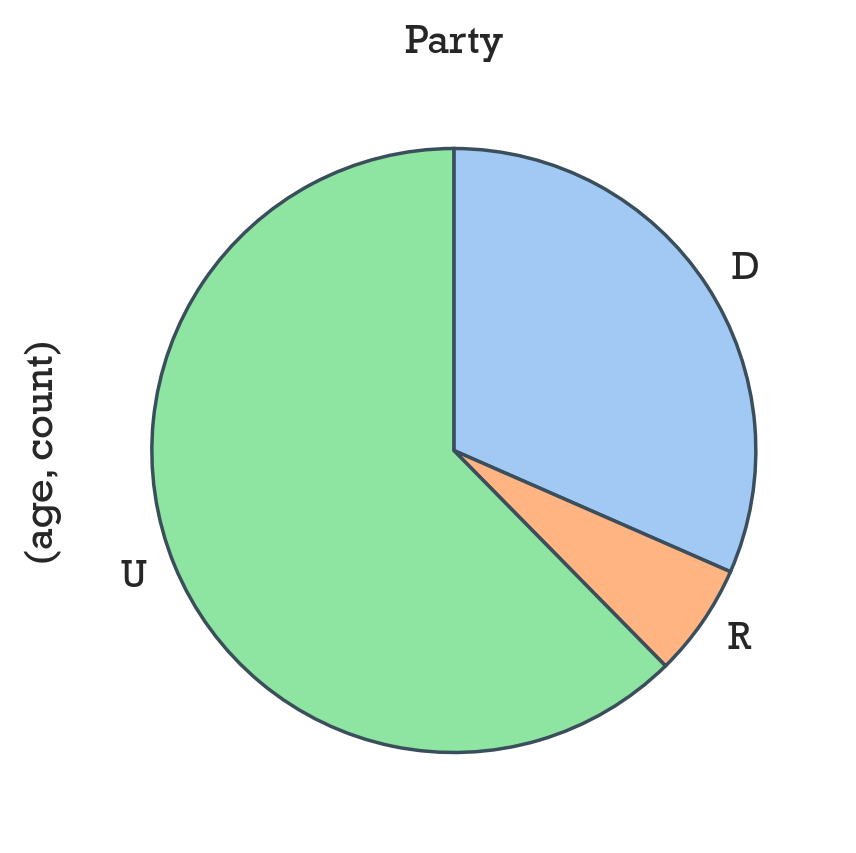

In [172]:
sns.set_theme()
sns.set(style="whitegrid", palette='pastel',font="Rockwell")
df[['party','age']].groupby('party').describe()['age','count'].plot(kind='pie', 
        title='Party', counterclock=False, startangle=-270, 
        wedgeprops={'edgecolor':'#3a4e5c','linewidth': 1, 'antialiased': True})

<AxesSubplot:title={'center':'Party Guessed'}, ylabel='(age, count)'>

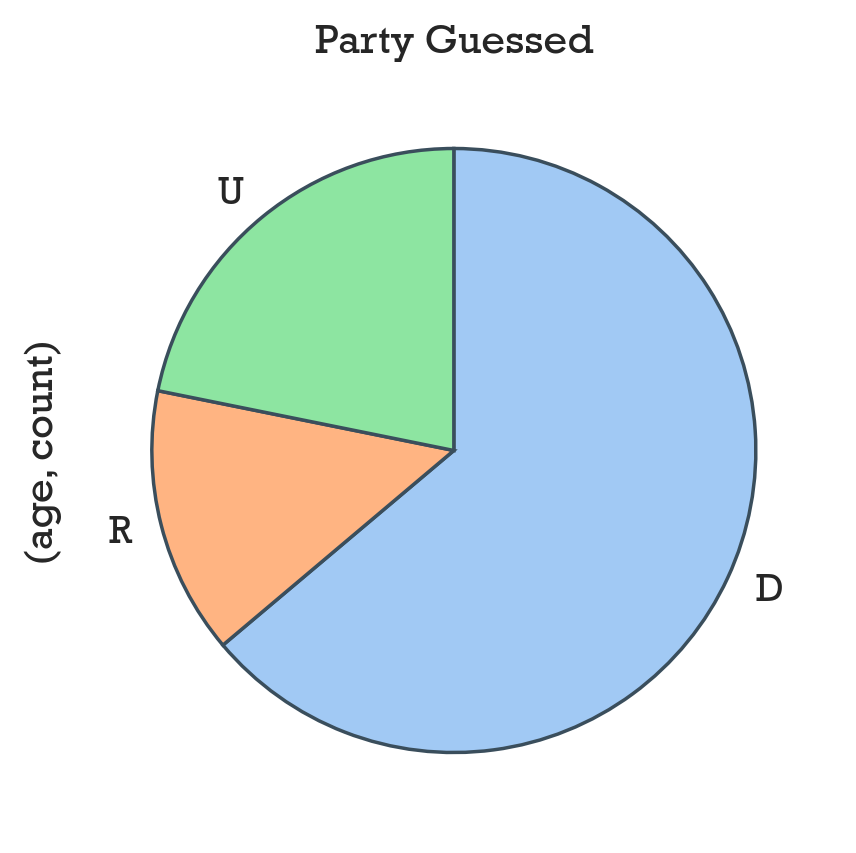

In [173]:
sns.set_theme()
sns.set(style="whitegrid", palette='pastel',font="Rockwell")
df[['party guess','age']].groupby('party guess').describe()['age','count'].plot(kind='pie', 
        title='Party Guessed', counterclock=False, startangle=-270, 
        wedgeprops={'edgecolor':'#3a4e5c','linewidth': 1, 'antialiased': True})

voted 2020
False    8776.0
True     1808.0
Name: (age, count), dtype: float64


<AxesSubplot:title={'center':'Voted 2020'}, ylabel='(age, count)'>

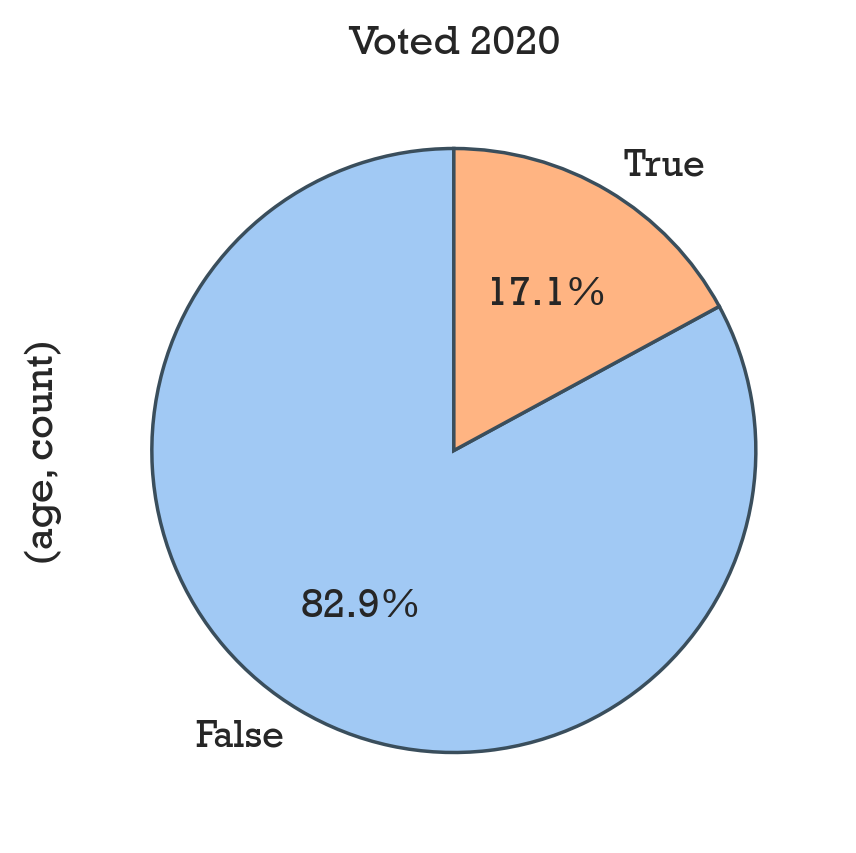

In [179]:
sns.set_theme()
sns.set(style="whitegrid", palette='pastel',font="Rockwell")
print(df[['voted 2020','age']].groupby('voted 2020').describe()['age','count'])
df[['voted 2020','age']].groupby('voted 2020').describe()['age','count'].plot(kind='pie', 
                    title='Voted 2020', counterclock=True, 
                    startangle=-270, autopct = "%.1f%%", 
                    wedgeprops={'edgecolor':'#3a4e5c','linewidth': 1, 'antialiased': True})

voted 2021
False    8898.0
True     2380.0
Name: (age, count), dtype: float64


<AxesSubplot:title={'center':'Voted 2021'}, ylabel='(age, count)'>

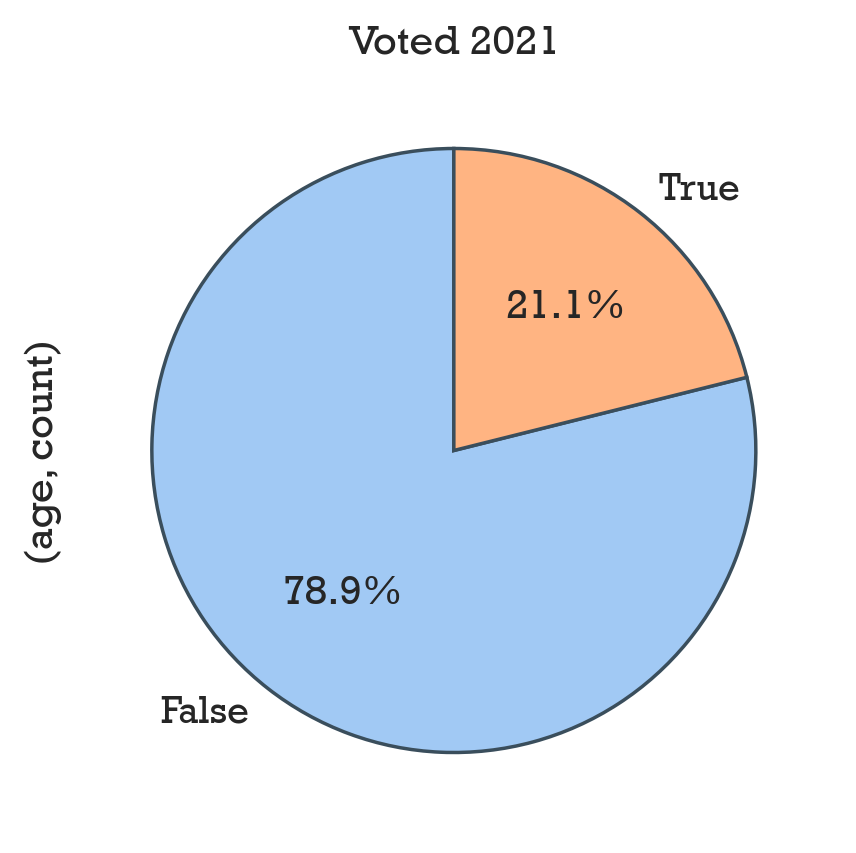

In [174]:
sns.set_theme()
sns.set(style="whitegrid", palette='pastel',font="Rockwell")
print(df[['voted 2021','age']].groupby('voted 2021').describe()['age','count'])
df[['voted 2021','age']].groupby('voted 2021').describe()['age','count'].plot(kind='pie', 
                    title='Voted 2021', counterclock=True, 
                    startangle=-270, autopct = "%.1f%%", 
                    wedgeprops={'edgecolor':'#3a4e5c','linewidth': 1, 'antialiased': True})

<AxesSubplot:xlabel='Age', ylabel='Number of voters'>

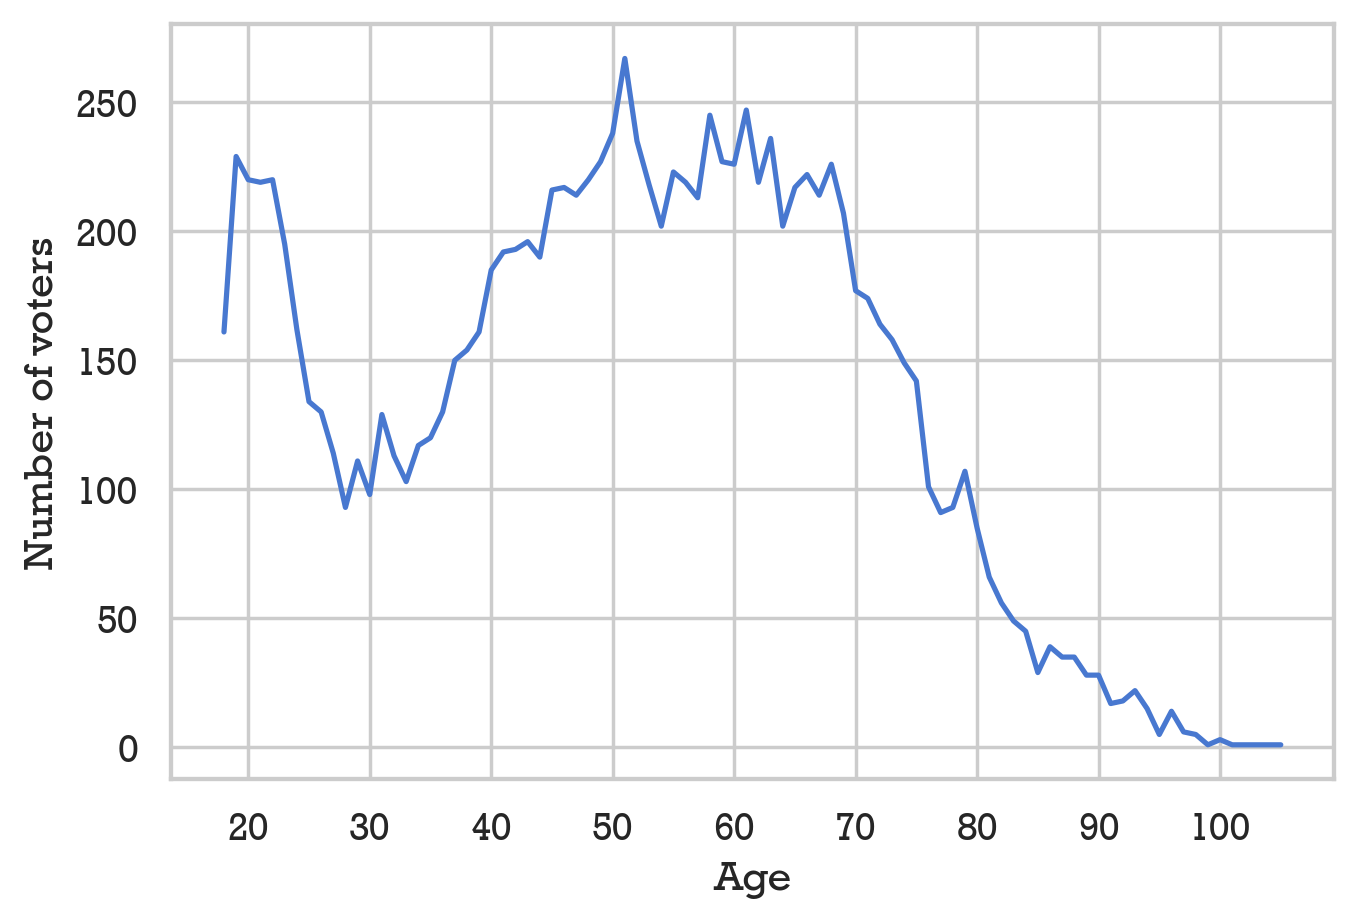

In [175]:
sns.set_theme()
sns.set(style="whitegrid", palette='muted',font="Rockwell")
df[['ethnicity','age']].groupby('age').describe()['ethnicity','count'].plot(kind='line', 
        ylabel='Number of voters', xlabel='Age', xticks=[x for x in range(20,110,10)])

In [176]:
df.isna().sum()

age               0
sex               0
party             0
party guess       0
race              0
ethnicity         0
precinct          0
prop value      651
voted 2010     5125
voted 2011     4910
voted 2012     4784
voted 2013     4297
voted 2014     4141
voted 2015     3919
voted 2016     3461
voted 2017     2830
voted 2018     2476
voted 2019     1828
voted 2020     1191
voted 2021      497
dtype: int64

In [177]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np

data = pd.DataFrame.from_dict({
    'x': np.random.randint(low=1, high=10, size=5),
    'y': np.random.randint(low=-1, high=1, size=5),
})

p = PolynomialFeatures(degree=3).fit(data)
print(p.get_feature_names_out(data.columns))

['1' 'x' 'y' 'x^2' 'x y' 'y^2' 'x^3' 'x^2 y' 'x y^2' 'y^3']
